<a href="https://colab.research.google.com/github/casalazara/Machine-Learning-IELE/blob/master/Proyecto/Proyecto_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import os
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


# Carga de datos

## Directorio con los datos

In [68]:
drive.mount('/gdrive')

path = "../gdrive/MyDrive/Data"


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


## Separación de los datos

In [70]:
data = []
labels = []
genres = ["Cumbia","Vallenato","Salsa","Merengue","Bachata"]
for i in range(len(genres)):   
    genre=genres[i]
    for img in os.listdir(path+"/"+genre):
      image=tf.keras.preprocessing.image.load_img(path+"/"+genre+"/"+img, color_mode='rgb', target_size= (300,300))
      image=np.array(image)
      data.append(image)
      labels.append(i)

data = np.array(data)
labels = np.array(labels)
labels = to_categorical(labels, 5)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
X_train[:2]

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

In [87]:
y_train[:2]

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [72]:
#X_train = np.expand_dims(X_train,axis=3)
#X_test = np.expand_dims(X_test,axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255.)

validation_datagen = ImageDataGenerator(rescale = 1./255.)

train_generator = train_datagen.flow(X_train, y_train,
  batch_size=8
)

validation_generator = validation_datagen.flow(X_test,y_test,
  batch_size=8
)


# Modelo


## Carga del modelo

In [73]:
model=VGG16(include_top=False,input_shape=(300,300,3))

#Congelamiento de capas

In [74]:
for layer in model.layers:
    layer.trainable=False

## Últimas capas

In [75]:
output=model.layers[-1].output
model_final=tf.keras.layers.Flatten()(output)
model_final=tf.keras.layers.Dense(512,activation='relu')(model_final)
model_final=tf.keras.layers.Dense(64,activation='relu')(model_final)
model_final=tf.keras.layers.Dense(5,activation='softmax')(model_final)

## Modelo final

In [76]:
model=tf.keras.models.Model(model.input,model_final)

## Compilación

In [77]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
#model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])


## Entrenamiento

In [79]:
history = model.fit_generator(train_generator, epochs=2,validation_data = validation_generator)

model.evaluate(X_test, y_test, verbose=0)

[37.3090934753418, 0.3166666626930237]

## Evaluación

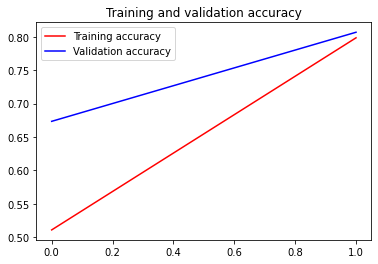

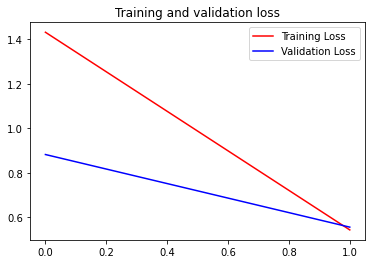

In [83]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()